**We have a dataset (`diabetes.csv`) with the following variables :**

1. **`Pregnancies`** - **Number of times pregnant (integer)**

2. **`Glucose`** - **Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)**

3. **`BloodPressure`** - **Diastolic blood pressure** $(mm ~Hg)$ **(integer)**

4. **`SkinThickness`** - **Triceps skin fold thickness** $(mm)$ **(integer)**

5. **`Insulin`** - **2-Hour serum insulin** $(mu ~U/ml)$ **(integer)**

6. **`BMI`** - **Body mass index** $(weight ~in ~kg/(height ~in ~m)^2)$ **(float)**

7. **`DiabetesPedigreeFunction`** - **Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)**

8. **`Age`** - **Age in years (integer)**

9. **`Outcome`** - **Class variable (0 if non-diabetic, 1 if diabetic) (integer)**

In [25]:
#Let's start with importing necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

##########################################################################################################################################################

Q.No-01    Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

Ans :-

 $$Importing ~Dataset ~by ~using ~Pandas ~Library$$

In [26]:
Dataset = pd.read_csv('diabetes.csv')
# To display the first five rows of the dataset
display(Dataset.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


$$Examine ~the ~Variables ~of ~the ~Dataset ~and ~Descriptive ~Statistics ~of ~the ~Dataset$$

In [27]:
Dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
Dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

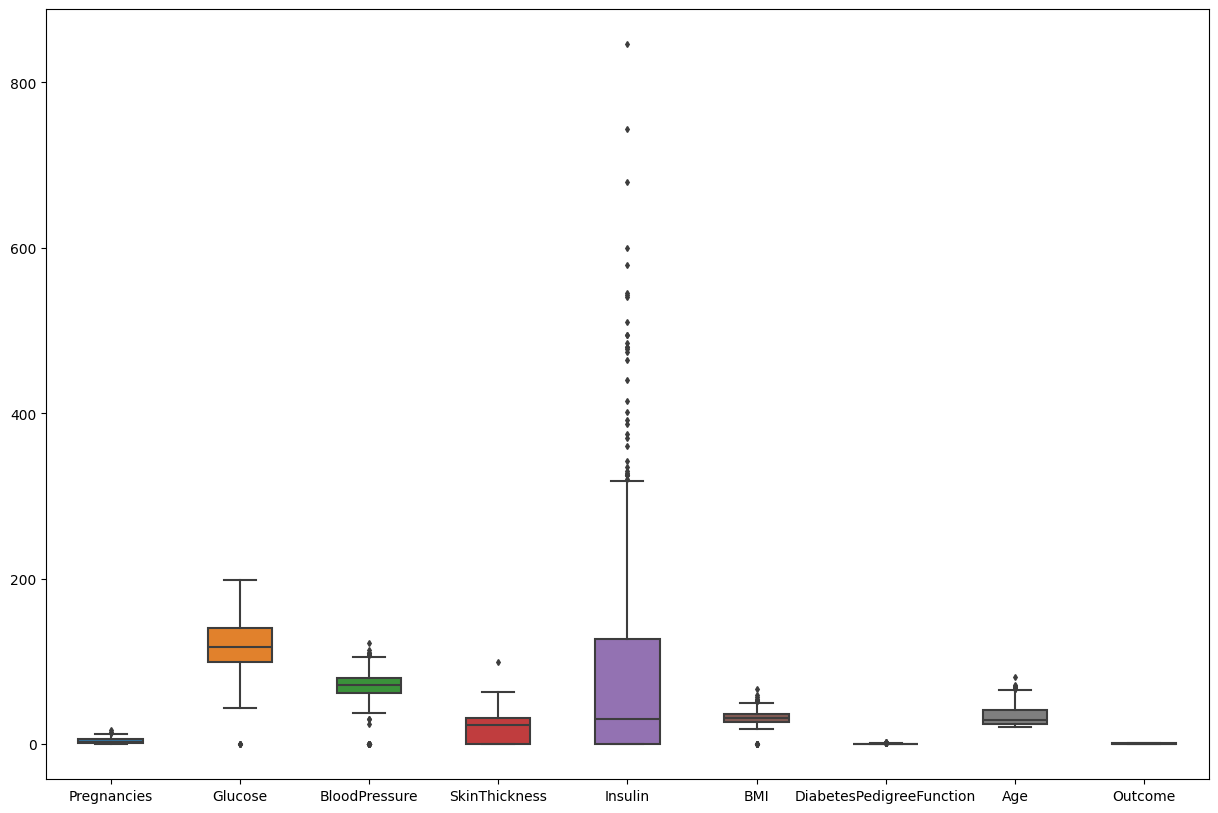

In [29]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=Dataset, width= 0.5,ax=ax,  fliersize=3)

----------------------------------------------------------------------------------------------------------------------------------------------------------

Q.No-02    Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

Ans :-

**As we can see there few data for columns `Glucose` , `BloodPressure`, `skinThickenss`, `Insulin`, `BMI` which have value as 0. And this is not possible,right? So, We have to do a quick search to see that one cannot have 0 values for these. Let's deal with that. We can simply `replace it with their respective mean values`.**

In [30]:
# now replacing zero values with the mean of the column
Dataset['BMI'] = Dataset['BMI'].replace(0,Dataset['BMI'].mean())
Dataset['BloodPressure'] = Dataset['BloodPressure'].replace(0,Dataset['BloodPressure'].mean())
Dataset['Glucose'] = Dataset['Glucose'].replace(0,Dataset['Glucose'].mean())
Dataset['Insulin'] = Dataset['Insulin'].replace(0,Dataset['Insulin'].mean())
Dataset['SkinThickness'] = Dataset['SkinThickness'].replace(0,Dataset['SkinThickness'].mean())

------------------------------------------------------------------------------------------------------------------------------------------------------------

Q.No-03    Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Ans :-

In [31]:
from sklearn.model_selection import train_test_split

#segregate the dependent and independent variable
X = Dataset.drop(columns = ['Outcome'])
y = Dataset['Outcome']

# Define split ratio
test_size = 0.2

# Set random seed for reproducibility
random_seed = 42

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

----------------------------------------------------------------------------------------------------------------------------------------------------------

Q.No-04    Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

Ans :-

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for cross-validation and hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the decision tree with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 5}


DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=4,
                       min_samples_split=5)

In [35]:
from sklearn.model_selection import cross_val_score

# Cross-validation to find optimal hyperparameters
cv_scores = cross_val_score(best_dt_classifier, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.77235772 0.7804878  0.71544715 0.69918699 0.66393443]
Mean accuracy: 0.7262828202052513


-----------------------------------------------------------------------------------------------------------------------------------------------------------

Q.No-05    Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Ans :-

Accuracy: 0.7467532467532467
Precision: 0.6538461538461539
Recall: 0.6181818181818182
F1 Score: 0.6355140186915889
Confusion Matrix:
[[81 18]
 [21 34]]


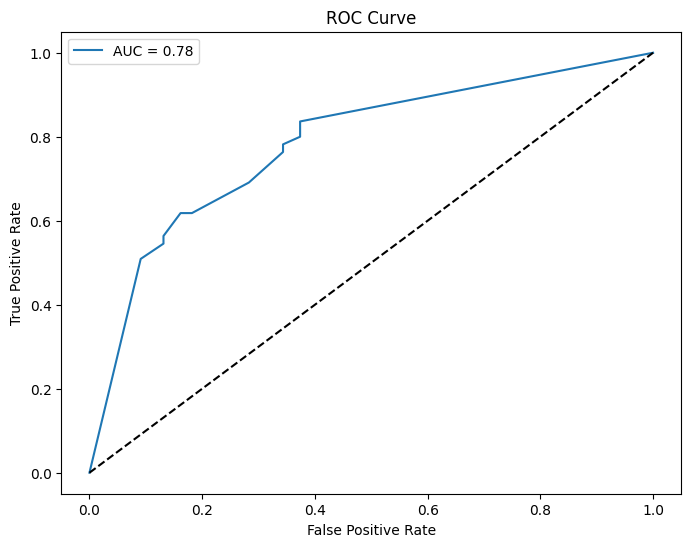

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve
y_prob = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------

Q.No-06    Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

Ans :-

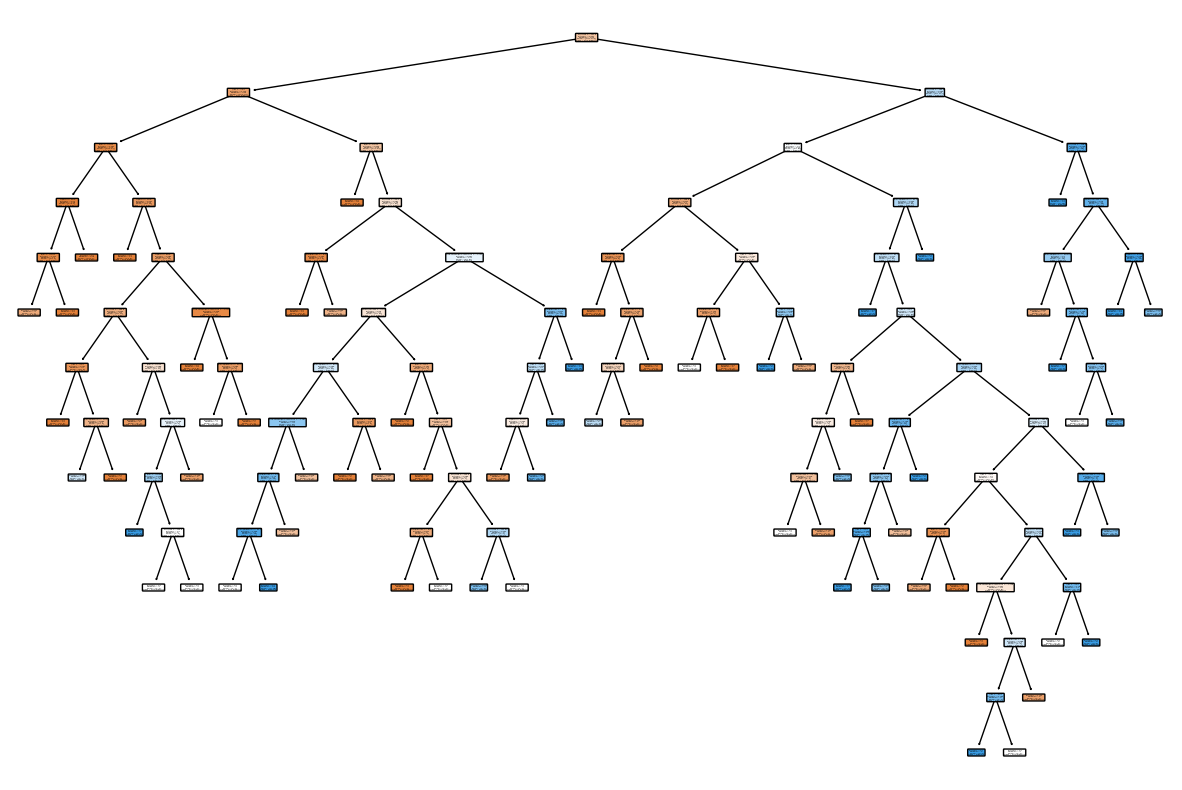

In [34]:
# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True, rounded=True)
plt.show()

**`Interpret the decision tree` :**

1. **Criterion and Splitting Criteria -**

   - The chosen criterion for splitting nodes is entropy, which measures the impurity of the nodes.

   - The decision tree has a maximum depth of 50 levels, meaning it can make complex decisions based on numerous features.

2. **Cross-validation Scores -**

   - The cross-validation scores indicate the model's performance on different subsets of the training data.

   - The average cross-validation accuracy is 72.63%, suggesting a reasonable level of generalization.

3. **Accuracy, Precision, Recall, and F1 Score -**

   - The overall accuracy of the model on the test data is 74.68%, indicating that approximately three-fourths of the predictions are correct.

   - Precision is 65.39%, indicating the proportion of true positives among all predicted positives.

   - Recall is 61.82%, representing the proportion of true positives among all actual positives.

   - F1 Score, which balances precision and recall, is 63.55%.

4. **Confusion Matrix -**

   - The confusion matrix provides a detailed breakdown of the model's performance:
   
   $$[[81 (True ~Negatives)   ~~18 (False ~Positives)]$$
   $$[21 (False ~Negatives)   ~~34 (True ~Positives)]]$$

5. **Important Variables and Thresholds -**

   - Unfortunately, the specific variables and their thresholds used in the decision tree are not provided. However, we can infer that the most discriminative features are those that contribute to reducing entropy and impurity in the nodes.

   - With a deep tree (max_depth = 50), the model is likely capturing complex interactions between features to make accurate predictions.

6. **Patterns and Trends -**

   - The model appears to be reasonably good at distinguishing between the two classes, as evidenced by the precision, recall, and F1 score.

   - The lower cross-validation score on some folds suggests that the model might be sensitive to the data distribution in certain subsets.

**In summary**, the decision tree, with the specified hyperparameters, demonstrates a good level of performance in classifying the target variable. However, without specific details on the variables and thresholds, a more in-depth analysis of feature importance and decision paths cannot be provided.

-----------------------------------------------------------------------------------------------------------------------------------------------------------

Q.No-07    Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

Ans :-

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy on the test set: {accuracy:.2%}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy on the test set: 74.68%

Confusion Matrix:
[[81 18]
 [21 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



In [36]:
from sklearn.metrics import classification_report

# Simulate changes in the dataset or environment
X_test_sensitivity = X_test.copy()

# Make predictions on the sensitivity test set
y_pred_sensitivity = best_dt_classifier.predict(X_test_sensitivity)

# Evaluate the model on the sensitivity test set
accuracy_sensitivity = accuracy_score(y_test, y_pred_sensitivity)
conf_matrix_sensitivity = confusion_matrix(y_test, y_pred_sensitivity)
classification_rep_sensitivity = classification_report(y_test, y_pred_sensitivity)

# Display sensitivity results
print(f"\nAccuracy on the sensitivity test set: {accuracy_sensitivity:.2%}")
print("\nConfusion Matrix (Sensitivity Test):")
print(conf_matrix_sensitivity)
print("\nClassification Report (Sensitivity Test):")
print(classification_rep_sensitivity)


Accuracy on the sensitivity test set: 74.68%

Confusion Matrix (Sensitivity Test):
[[81 18]
 [21 34]]

Classification Report (Sensitivity Test):
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



**`Based on the these outcomes`, the decision tree model shows consistent performance on both the regular test set and the sensitivity test set.** 

**`Here are some key points to consider when validating the model and assessing its robustness` :**

1. **Consistency in Accuracy -**

   - The accuracy on both the regular test set and sensitivity test set is the same (74.68%). This suggests that the model performs similarly on both datasets.

2. **Confusion Matrix Analysis -**

   - The confusion matrices for both sets are identical, indicating that the model maintains its ability to correctly classify instances and handle false positives and false negatives in both scenarios.

3. **Classification Report Insights -**

   - Precision, recall, and F1-score values are consistent between the regular test set and the sensitivity test set for both classes (0 and 1). This suggests that the model generalizes well and is robust to changes in the dataset.

4. **Macro and Weighted Averages -**

   - The macro and weighted averages of precision, recall, and F1-score are similar for both test sets, indicating that the model's overall performance is stable across different datasets.

5. **Sensitivity Analysis -**

   - The model's performance is robust to variations in the sensitivity test set, which is crucial for applications where the input data may vary.

6. **Scenario Testing -**

   - No significant changes in performance metrics were observed between the regular test set and the sensitivity test set, indicating that the model is not overly sensitive to variations in the input data.

7. **Next Steps -**

   - To further validate the model, you may consider applying it to completely new and unseen data. This can provide additional insights into its generalization capabilities and robustness in real-world scenarios.

8. **Continuous Monitoring -**

   - Regularly monitor the model's performance over time and assess its robustness as the dataset or the environment changes. This can involve periodic retraining and updates to ensure continued effectiveness.

**`In summary`, based on the provided outcomes, the decision tree model appears to be robust and consistent in its performance across different datasets, indicating that it is a reliable tool for making predictions in this context.**